In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import evaluation as eval
import simulation as sim
import reconstruction as reco
import offset_analysis as a

In [252]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/62dot5_yz_50_5/"
n_runs = 6
n_offsets = 50

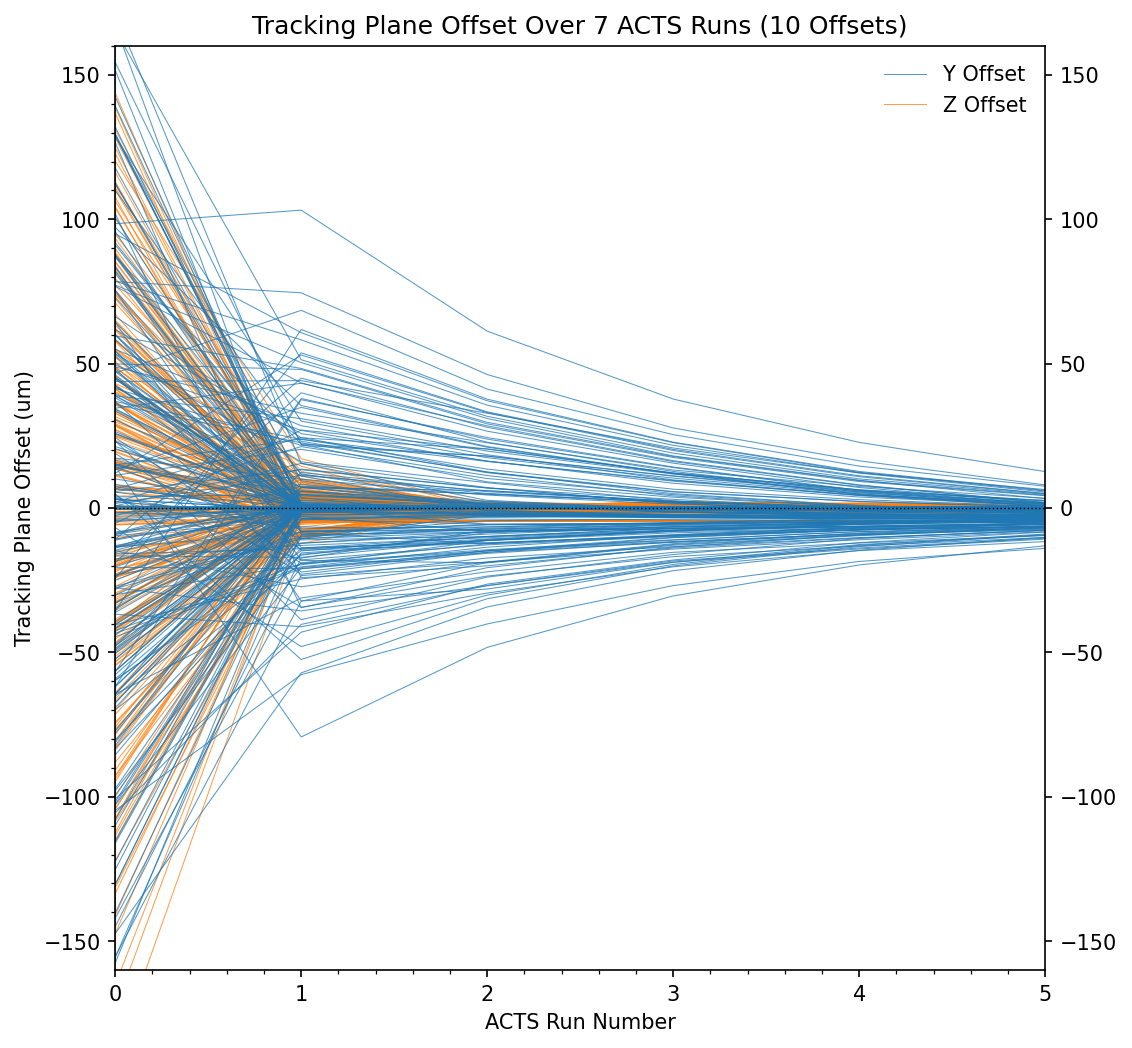

In [253]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*6))
for i in range(n_runs):
    x[i] += i

y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets].flatten()*1000]
for i in range(1, n_runs):
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))
plt.yticks([-150, -100, -50, 0, 50, 100, 150])
plt.minorticks_on()
plt.ylim(-160, 160)
plt.xlim(0, n_runs-1)


plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Offset (um)")
plt.title("Tracking Plane Offset Over 7 ACTS Runs (50 Offsets)")
plt.tick_params(right = True, labelright = True)

plt.plot(x[0], y[0], lw = 0.5, alpha = 0.75, color="tab:blue", label = "Y Offset")
plt.plot(x[0], z[0], lw = 0.5, alpha = 0.75, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Offset", "Z Offset"], frameon=False)

plt.plot(x, z, lw = 0.5, alpha = 0.75, color="tab:orange")
plt.plot(x, y, lw = 0.5, alpha = 0.75, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)

plt.show()

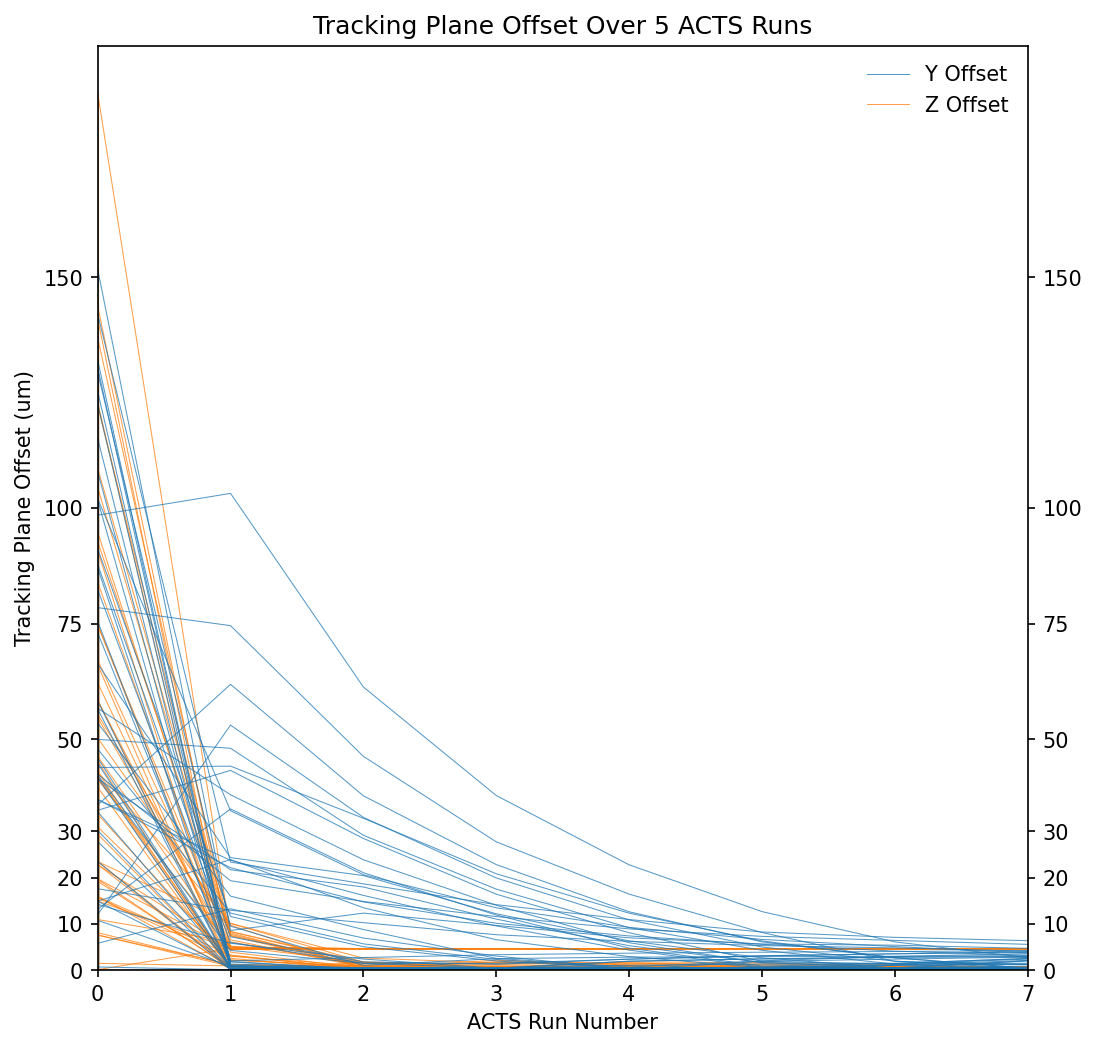

In [244]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*6))
for i in range(n_runs):
    x[i] += i

y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets].flatten()*1000]
for i in range(1, n_runs):
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))

plt.yticks([0, 10, 20, 30, 50, 75, 100, 150])

plt.ylim(0, 200)
plt.xlim(0, n_runs-1)


plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Offset (um)")
plt.title("Tracking Plane Offset Over 5 ACTS Runs")
plt.tick_params(right = True, labelright = True)

plt.plot(x[0], np.abs(y[0]), lw = 0.5, alpha = 0.75, color="tab:blue", label = "Y Offset")
plt.plot(x[0], np.abs(z[0]), lw = 0.5, alpha = 0.75, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Offset", "Z Offset"], frameon=False)

plt.plot(x, np.abs(z), lw = 0.5, alpha = 0.75, color="tab:orange")
plt.plot(x, np.abs(y), lw = 0.5, alpha = 0.75, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)

plt.show()

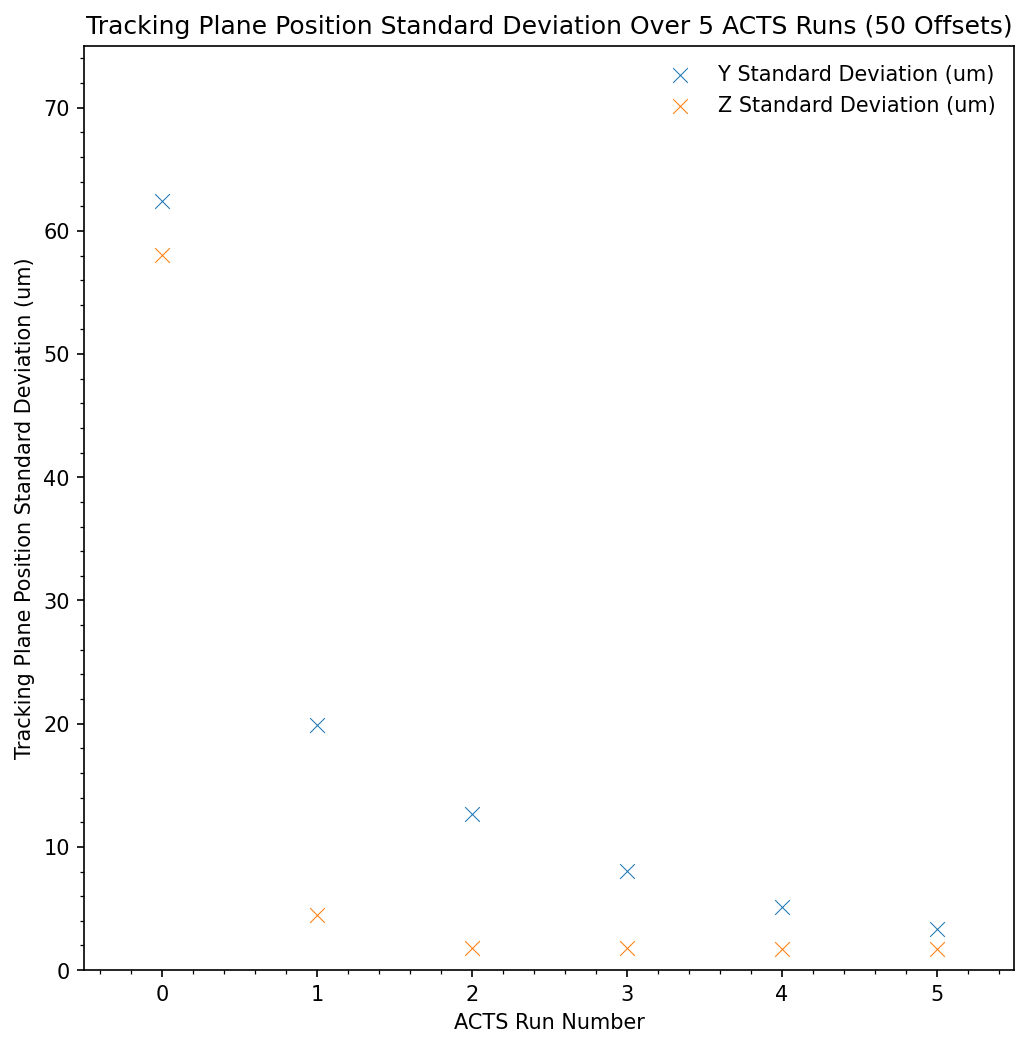

In [254]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

plt.ylim(0, 75)
plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()

plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Position Standard Deviation (um)")
plt.title("Tracking Plane Position Standard Deviation Over 5 ACTS Runs (50 Offsets)")

plt.scatter(x, std_y, lw = 0.5, color="tab:blue", s = 50, marker = "x")
plt.scatter(x, std_z, lw = 0.5, color="tab:orange", s = 50, marker = "x")

plt.legend(labels = ["Y Standard Deviation (um)", "Z Standard Deviation (um)"], frameon=False)
plt.show()

In [247]:
mean_y = np.mean(y, axis = 1)
mean_z = np.mean(z, axis = 1)

print(mean_y)
print(mean_z)

[ 7.55276984  9.40958434  5.44585986  2.80150369  1.03668979 -0.07241435
 -0.75227227 -1.08897227]
[-5.31075034 -1.59325589 -0.70997899 -0.67514051 -0.75823804 -0.78756197
 -0.83147824 -0.85866719]


In [255]:
std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

print(std_y)
print(std_z)

[62.4473966  19.8696908  12.7085147   8.07215396  5.11439834  3.36678482]
[58.0745777   4.48114168  1.80748978  1.79439342  1.73130009  1.70219484]
